<a href="https://colab.research.google.com/github/bedadiggelmann/bina/blob/main/BINA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Helper Functions



**Data Loading Functions**

This script loads data from a CSV file. Ensure that the path and the encoding match the data file specifics.

In [80]:
def load_data(filepath, encoding='ISO-8859-1', delimiter=';'):
    return pd.read_csv(filepath, encoding=encoding, delimiter=delimiter)

**Data Filtering Functions**

Filters the dataset for specific municipalities using a unique identifier contained in a column.

In [81]:
def filter_data_by_gemeinde(data, column_name, gemeinde_code):
    return data[data[column_name].str.contains(gemeinde_code)]

**Data Extraction Functions**

Extracts yearly data for given conditions and converts non-numeric entries appropriately.

In [82]:
def extract_yearly_data(gemeinde_data, condition_value, typ_value, start_col=4):
    yearly_data = gemeinde_data[
        (gemeinde_data["Anzahl/Anteil"] == condition_value) &
        (gemeinde_data["Leerwohnung (Typ)"].str.contains(typ_value, na=False))
    ].iloc[:, start_col:]
    yearly_data = yearly_data.replace('...', pd.NA)  # Replace '...' with NaN
    yearly_data = yearly_data.apply(pd.to_numeric, errors='coerce')  # Convert to numeric, coercing errors
    years = yearly_data.columns.tolist()  # Get the list of years (column names)
    return yearly_data.iloc[0] if not yearly_data.empty else pd.Series([pd.NA] * len(years), index=years)

**Plotting Functions**

Functions to plot time series and bar charts for visual comparisons.

In [83]:
def plot_time_series(data_dict, title, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(14, 6))
    for label, data in data_dict.items():
        ax.plot(data.index, data.values, label=label, marker='o')
    ax.set_title(title)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid(True)
    plt.tight_layout()
    plt.show()

# Usage



**1. Load and Filter Data**

Load and filter data for each municipality.

In [70]:
csv_path = 'kanton_stgallen.csv'
csv_data = load_data(csv_path)

gemeinde_haeggenschwil_data = filter_data_by_gemeinde(csv_data, 'Grossregion (<<) / Kanton (-) / Gemeinde (......)', '3201')
gemeinde_muolen_data = filter_data_by_gemeinde(csv_data, 'Grossregion (<<) / Kanton (-) / Gemeinde (......)', '3202')

gemeinde_haeggenschwil_data.head()

,Grossregion (<<) / Kanton (-) / Gemeinde (......),Anzahl Wohnräume,Leerwohnung (Typ),Anzahl/Anteil,1995,1996,1997,1998,1999,2000,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
98,......3201 Häggenschwil,Anzahl Wohnräume - Total,Leer stehende Wohnung - Total,Anzahl,0,3,3,8,14,21,...,14,11,10,11,11,9,8,5,6,4
99,......3201 Häggenschwil,Anzahl Wohnräume - Total,Leer stehende Wohnung - Total,Leerwohnungsziffer,...,...,0.85,2.25,3.91,5.41,...,3.03,2.25,1.96,2.14,2.11,1.65,1.45,0.90,1.08,0.72
100,......3201 Häggenschwil,Anzahl Wohnräume - Total,Leer stehendes Einfamilienhaus,Anzahl,0,0,0,0,1,13,...,0,1,2,2,3,2,0,1,0,0
101,......3201 Häggenschwil,Anzahl Wohnräume - Total,Leer stehendes Einfamilienhaus,Leerwohnungsziffer,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
102,......3201 Häggenschwil,Anzahl Wohnräume - Total,Leer stehende Wohnung in Mehrfamilienhaus,Anzahl,0,3,3,8,13,8,...,14,10,8,9,8,7,8,4,6,4


**2. Extract Leerwohnungsanzahl and Leerwohnungsziffer for municipalities**


In [71]:
# Leerwohnungsanzahl
haeggenschwil_leerwohnungsanzahl  = extract_yearly_data(
    gemeinde_haeggenschwil_data,
    "Anzahl",
    "Leer stehende Wohnung - Total"
    )

muolen_leerwohnungsanzahl = extract_yearly_data(
    gemeinde_muolen_data,
    "Anzahl",
    "Leer stehende Wohnung - Total"
    )

# Leerwohnungsziffer
haeggenschwil_leerwohnungsziffer = extract_yearly_data(
    gemeinde_haeggenschwil_data,
    'Leerwohnungsziffer',
    'Leer stehende Wohnung - Total'
)

muolen_leerwohnungsziffer = extract_yearly_data(
    gemeinde_muolen_data,
    'Leerwohnungsziffer',
    'Leer stehende Wohnung - Total'
)


**3. Plot the Data**

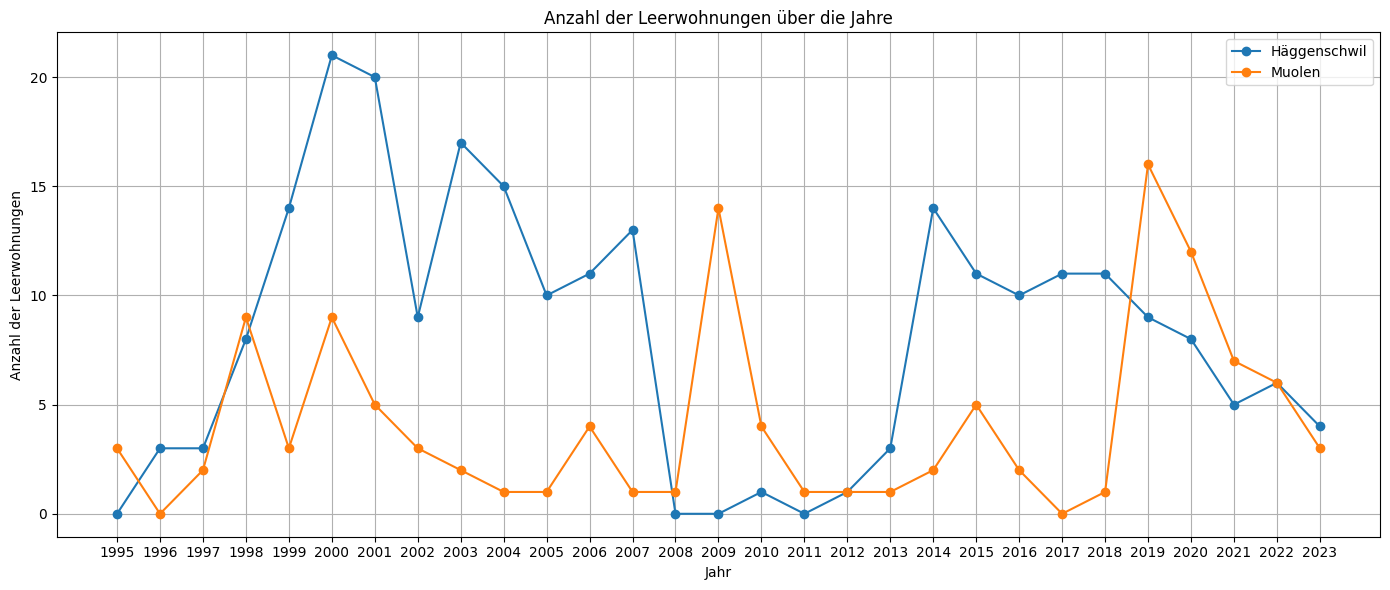

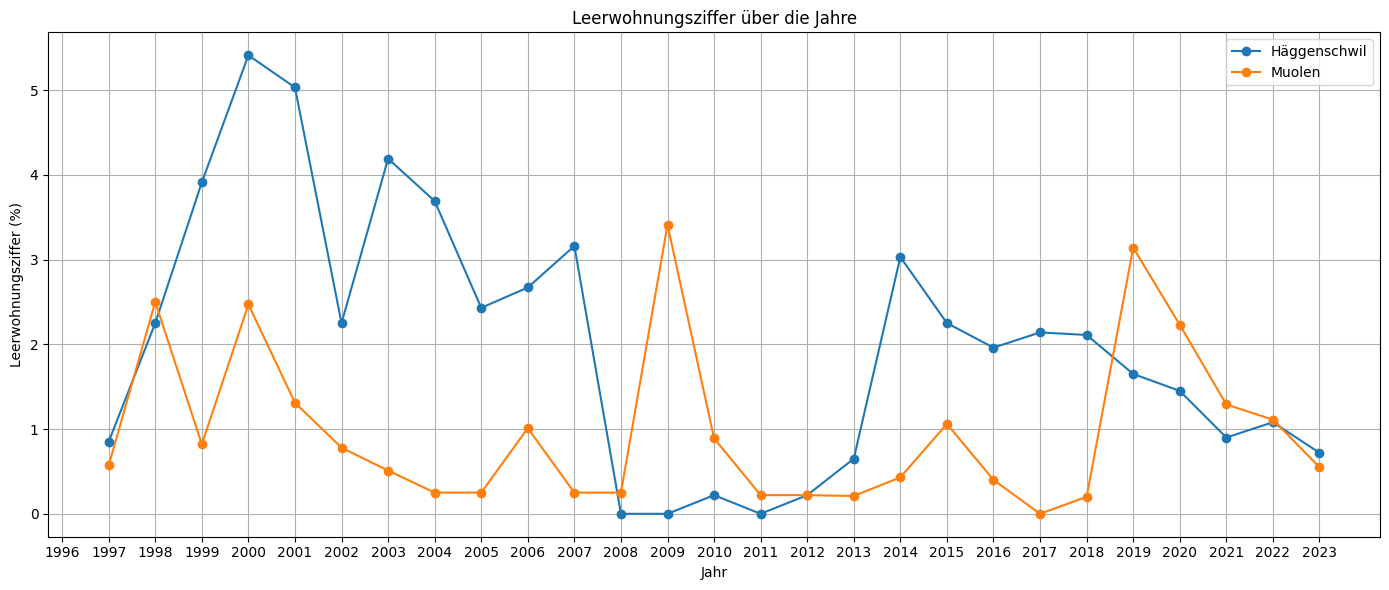

In [84]:
# Anzahl der Leerwohnungen über die Jahre
plot_time_series(
    {
        'Häggenschwil': haeggenschwil_leerwohnungsanzahl,
        'Muolen': muolen_leerwohnungsanzahl
    },
    'Anzahl der Leerwohnungen über die Jahre',
    'Jahr',
    'Anzahl der Leerwohnungen'
)

# Leerwohnungsziffer über die Jahre
plot_time_series(
    {
        'Häggenschwil': haeggenschwil_leerwohnungsziffer,
        'Muolen': muolen_leerwohnungsziffer
    },
    'Leerwohnungsziffer über die Jahre',
    'Jahr',
    'Leerwohnungsziffer (%)'
)
